# Preparation

In [1]:
import os 
os.chdir("/home/jovyan/work")

# Control Task 2.1
Sample from the given GMM and plot the values as histogram,

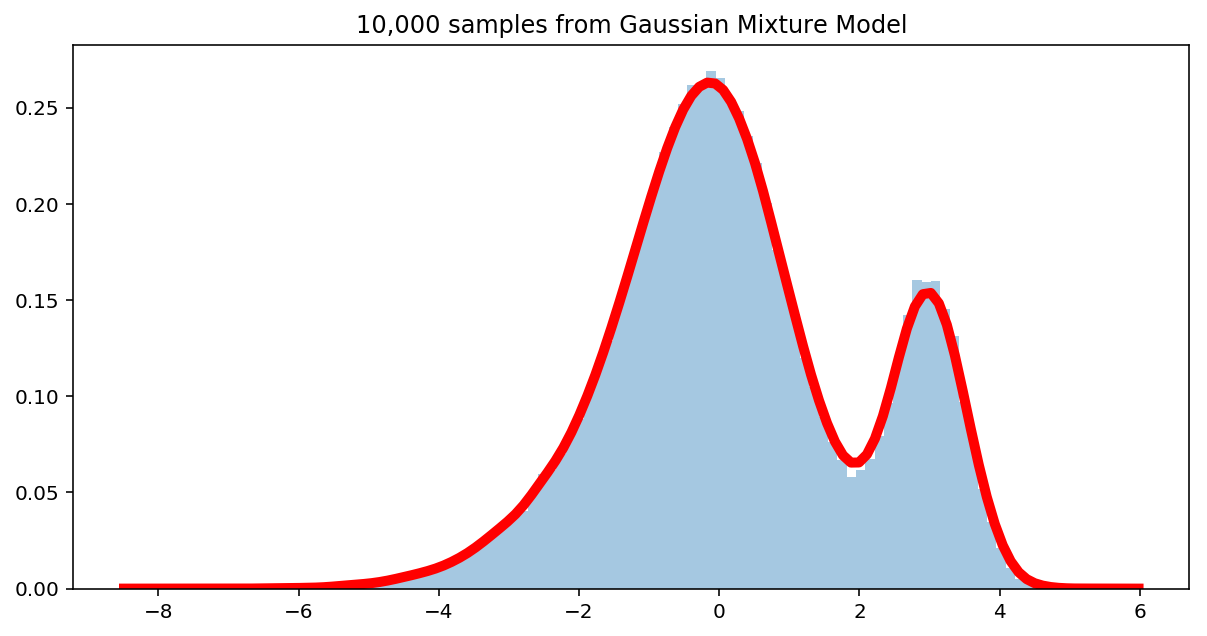

In [2]:
# %load src/2-01-gmm-samples.py
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Config
os.chdir("/home/jovyan/work")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare Distributions
mus = [-1, 0, 3]
sigs = [1.5, 1, 0.5]
pis = [0.3, 0.5, 0.2]
N = []
for mu, sig in zip(mus, sigs):
    N.append(norm(loc=mu, scale=sig))

# Sample
n_samples = 100000
samples = np.empty(0)
for pi, n in zip(pis, N):
    samples = np.concatenate((samples, n.rvs(int(n_samples*pi))))

# Evaluation
sns.distplot(
    samples, 
    bins=100, 
    kde_kws={"color":"red", "linewidth":5})
plt.title("10,000 samples from Gaussian Mixture Model")
plt.savefig("./results/2-01-gmm-sample.png")

# Control Task 2.2: AlbSig Housing Prices 
Create a GMM for given housing prices in Albstadt-Sigmaringen.

In [3]:
# %load src/2-02-0-appartments.py
# Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Config
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)

# Prepare the Distributions
mus = np.arange(500, 1500, 250)
sigs = np.array([70, 90, 120, 150]) # given
N = []
for mu, sig in zip(mus, sigs):
    N.append(norm(loc=mu, scale=sig))

### Plot the Single Distributions

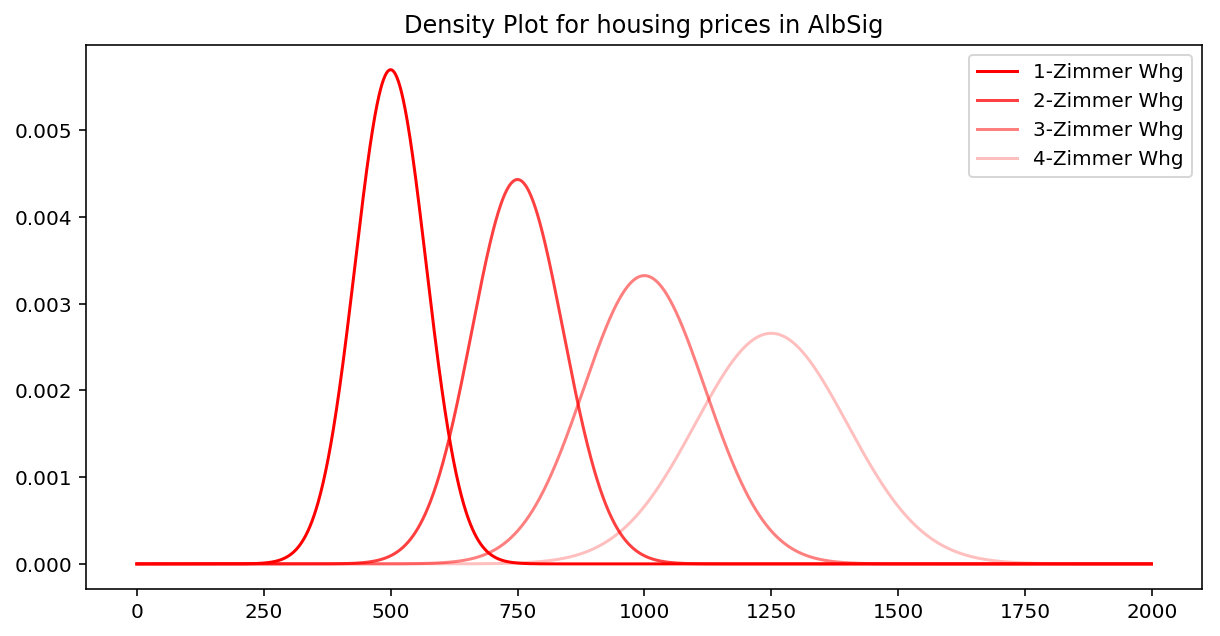

In [4]:
# %load src/2-02-1-appartments-single-distributions.py
x = np.arange(2000)
for idx, n in enumerate(N):
    plt.plot(x, n.pdf(x), color="red", alpha=1-idx*0.25)
plt.legend(["{}-Zimmer Whg".format(i) for i in range(1, 5)])
plt.title("Density Plot for housing prices in AlbSig")
plt.savefig("./results/2-02-1-single-distributions.png")

### Plot GMM

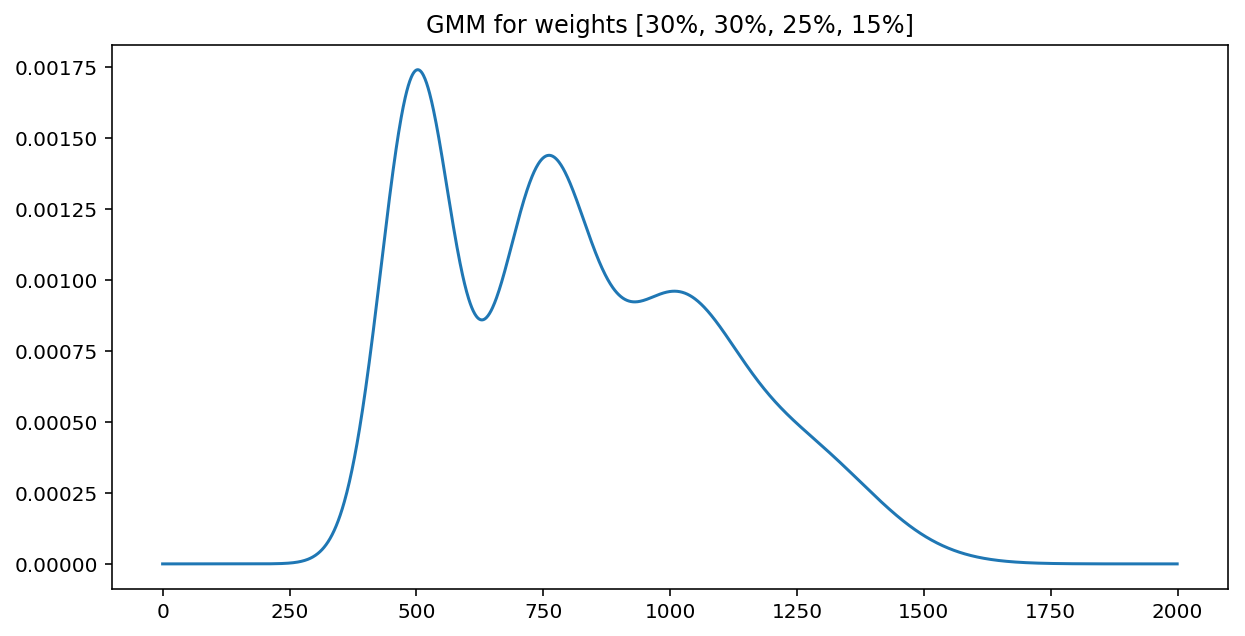

In [5]:
# %load src/2-02-3-appartments-gmm.py
# Prepare the mixture
pis = [.3, .3, .25, .15]
PDF = np.zeros_like(x, dtype="float64")
for pi, n in zip(pis, N):
    PDF += pi * n.pdf(x)

# Evaluate
plt.plot(x, PDF)
plt.title("GMM for weights [30%, 30%, 25%, 15%]")
plt.savefig("./results/2-02-2-mixed-distributions.png")

### Sample from GMM

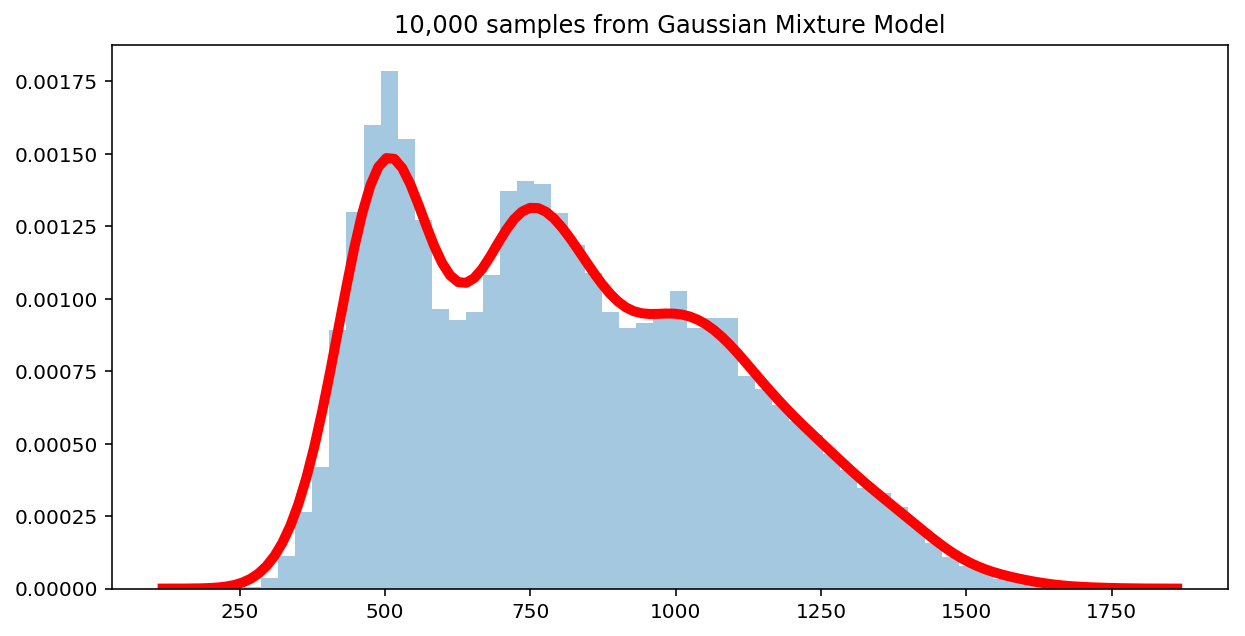

In [6]:
# %load src/2-02-4-appartments-sampling.py
# Sample
n_samples = 10000
samples = np.empty(0)
for pi, n in zip(pis, N):
    samples = np.concatenate((samples, n.rvs(int(pi*n_samples))))

# Evaluate
sns.distplot(
    samples, 
    bins=50, 
    kde_kws={"color":"red", "linewidth":5})
plt.title("10,000 samples from Gaussian Mixture Model")
plt.savefig("./results/2-02-3-sample-with-mixed-distribution.png")

### Probabilities

In [7]:
# %load src/2-02-5-apparments-probabilities.py
# 1-zimmer whg, preis < 300
print("1-room apt: {}".format(norm.cdf(x=300, loc=500, scale=70)))

# 2-zimmer whg, preis < 300
print("2-room apt: {}".format(norm.cdf(x=300, loc=750, scale=90)))

# x-zimmer whg, preis > 700
CDF = 0.0
for pi, n in zip(pis, N):
    CDF += pi * n.cdf(700)
print("X-room apt: {}".format(1-CDF))

1-room apt: 0.0021373669800862794
2-room apt: 2.866515718791933e-07
X-room apt: 0.6122931555778954
